# Performing Data Cleaning and EDA on Titanic Dataset

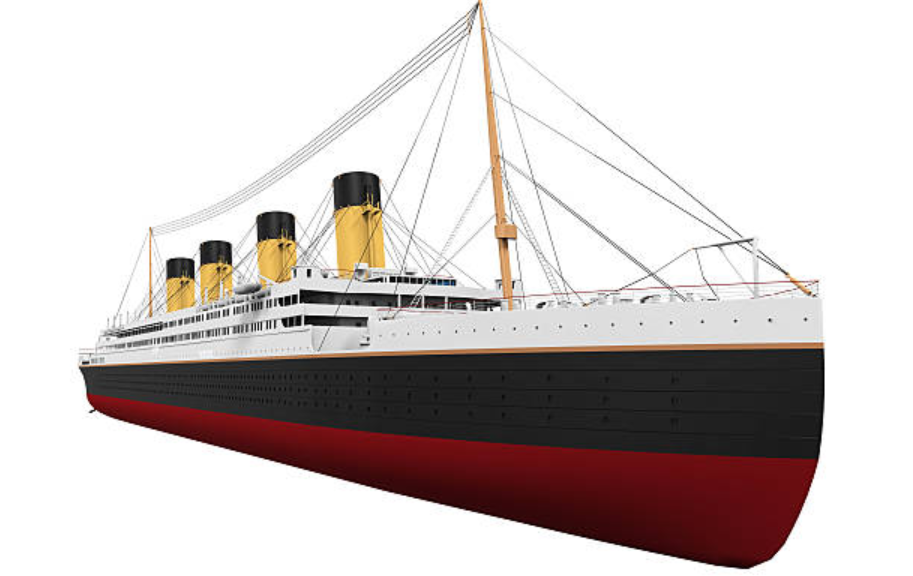

In [14]:
from IPython.display import Image
Image(filename=r"C:\Users\suman\OneDrive\Pictures\Screenshots\Screenshot 2024-06-16 133403.png")

In [57]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
titanic = pd.read_csv(r"C:\Users\suman\OneDrive\Pictures\Documents\train.csv")

In [11]:
titanic.shape

(891, 12)

## DATASET

In [6]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Column information

In [98]:
titanic.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

In [102]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
#getting details
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

### Finding Missing values

In [100]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Inputting missing values with mostly appeared value i.e. 'S' for Embarked column

In [104]:
# Fill missing values for 'Embarked' with the mode
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

### Droping Cabing Column

In [85]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')
# Drop unnecessary columns that won't contribute to the analysis
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
columns_present = [col for col in columns_to_drop if col.lower() in titanic.columns]
titanic.drop(columns_present, axis=1, inplace=True)

In [106]:
titanic.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

### Five point summary

In [105]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Performing EDA (Exploratory Data Analysis)

## Explore the relationship between variables and identify patterns and trends in dataset

## 1.Age Distribution

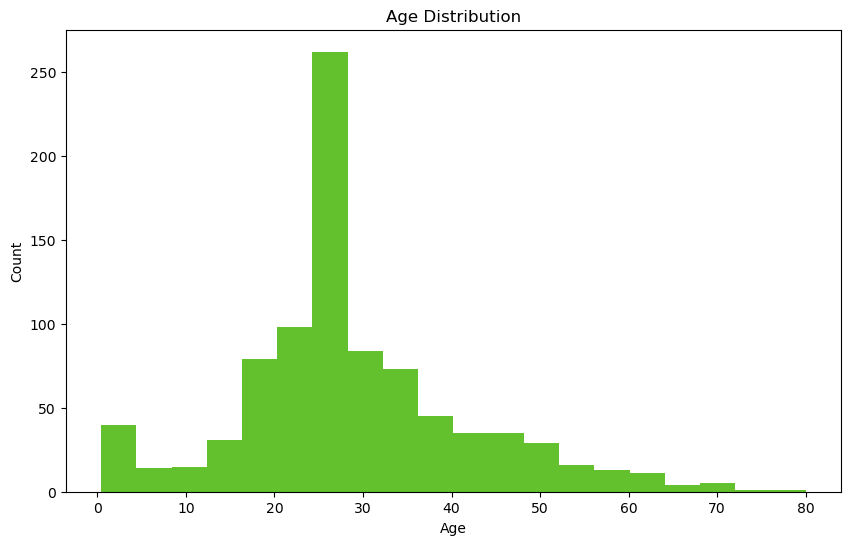

In [50]:
#exploring the age distribution of passengers
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'],color='#63C12E',bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

## 2.Fare Distribution

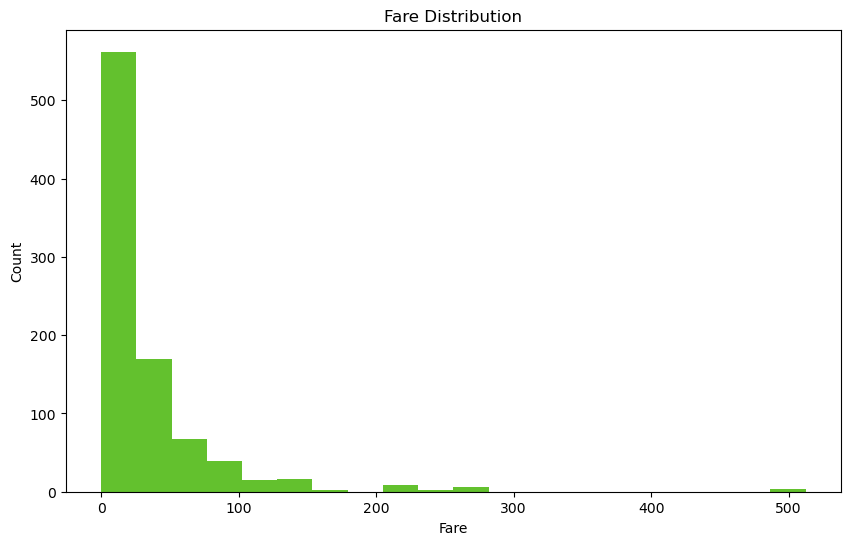

In [41]:
#exploring the fare distribution of passengers
plt.figure(figsize=(10, 6))
plt.hist(titanic['Fare'],color='#2E52C1',bins=20)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

In [42]:
#Exploring the relation ship between 'sex' and ' survived'
sex_survived=titanic.groupby('Sex')['Survived'].mean()*100
print(f"Survival Rate by sex : \n {sex_survived}")

Survival Rate by sex : 
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


## 3.Survival Rate by Sex

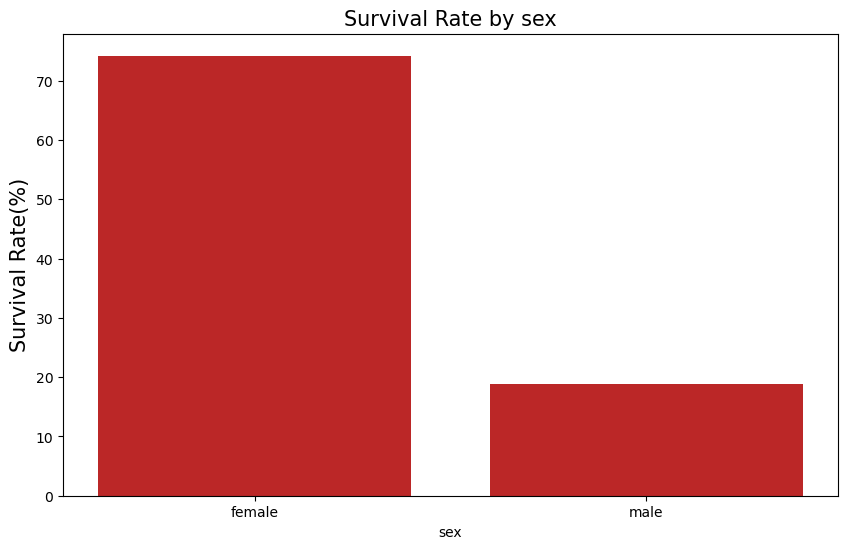

In [53]:
#exploring the  distribution of Survival Rate by Sex
plt.figure(figsize=(10, 6))
plt.bar(sex_survived.index,sex_survived.values,color='#BB2727')
plt.xlabel('sex')
plt.ylabel('Survival Rate(%)',fontsize=15)
plt.title('Survival Rate by sex',fontsize=15)
plt.show()

## 4.Survival Rate by Pclass

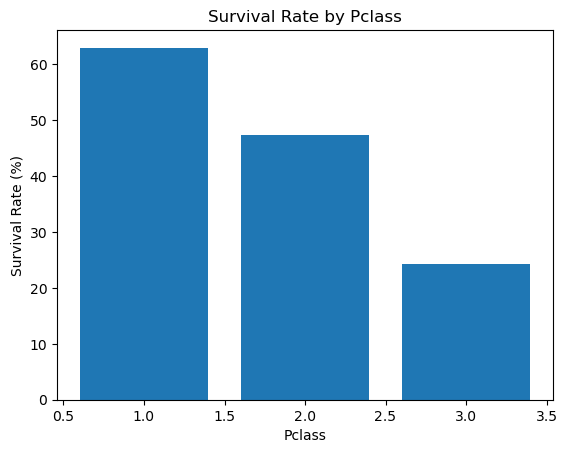

In [55]:
# Visualizing the relationship between 'Pclass' and 'Survived'
plt.bar(pclass_survived.index, pclass_survived.values)
plt.xlabel('PClass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

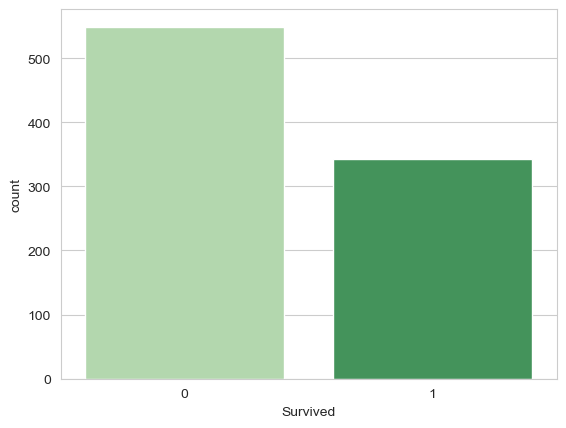

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='Greens')

<Axes: xlabel='Survived', ylabel='count'>

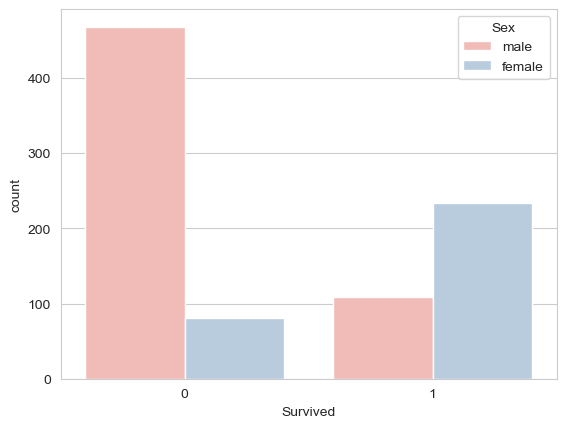

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='Pastel1')

C:\Users\suman\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


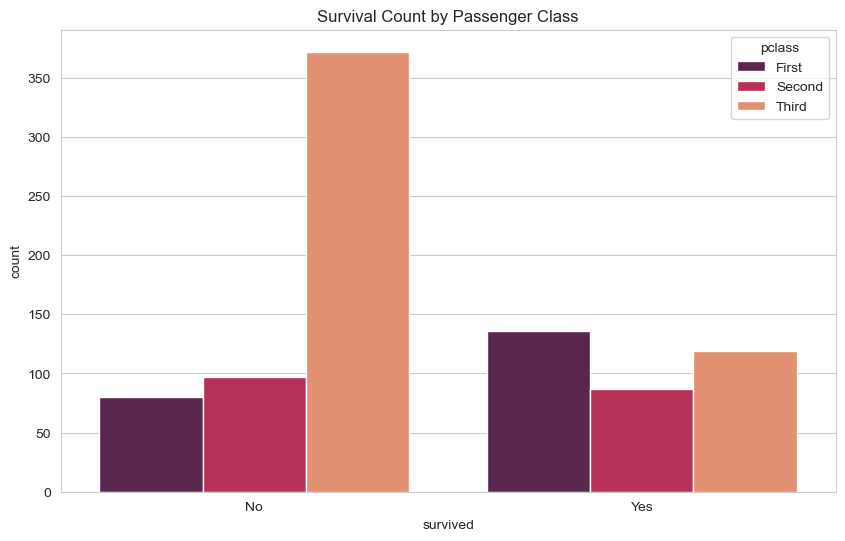

In [78]:
# Ensure 'survived' and 'pclass' are treated as categorical variables
titanic['survived'] = titanic['survived'].astype('category')
titanic['pclass'] = titanic['pclass'].astype('category')

# Convert the categories to strings
titanic['survived'] = titanic['survived'].cat.rename_categories({0: 'No', 1: 'Yes'})
titanic['pclass'] = titanic['pclass'].cat.rename_categories({1: 'First', 2: 'Second', 3: 'Third'})

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='survived', hue='pclass', data=titanic, palette='rocket')
plt.title('Survival Count by Passenger Class')
plt.show()

# Plotting Hisplot

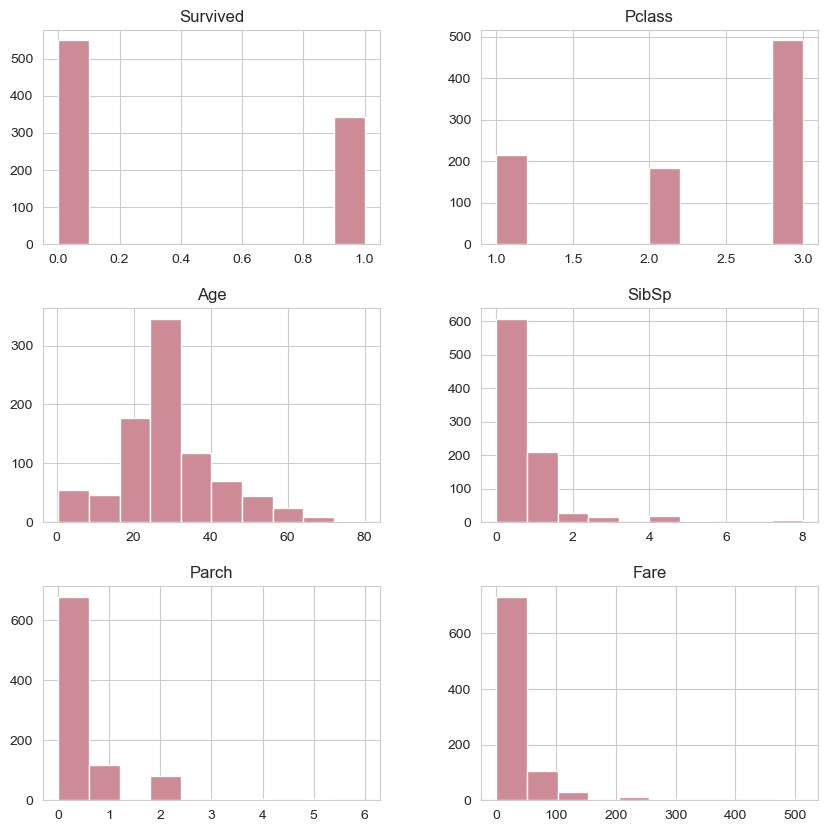

In [63]:
titanic.hist(figsize=(10,10),color='#CD8C95')
plt.show()

# Plotting Pairplot

C:\Users\suman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\suman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

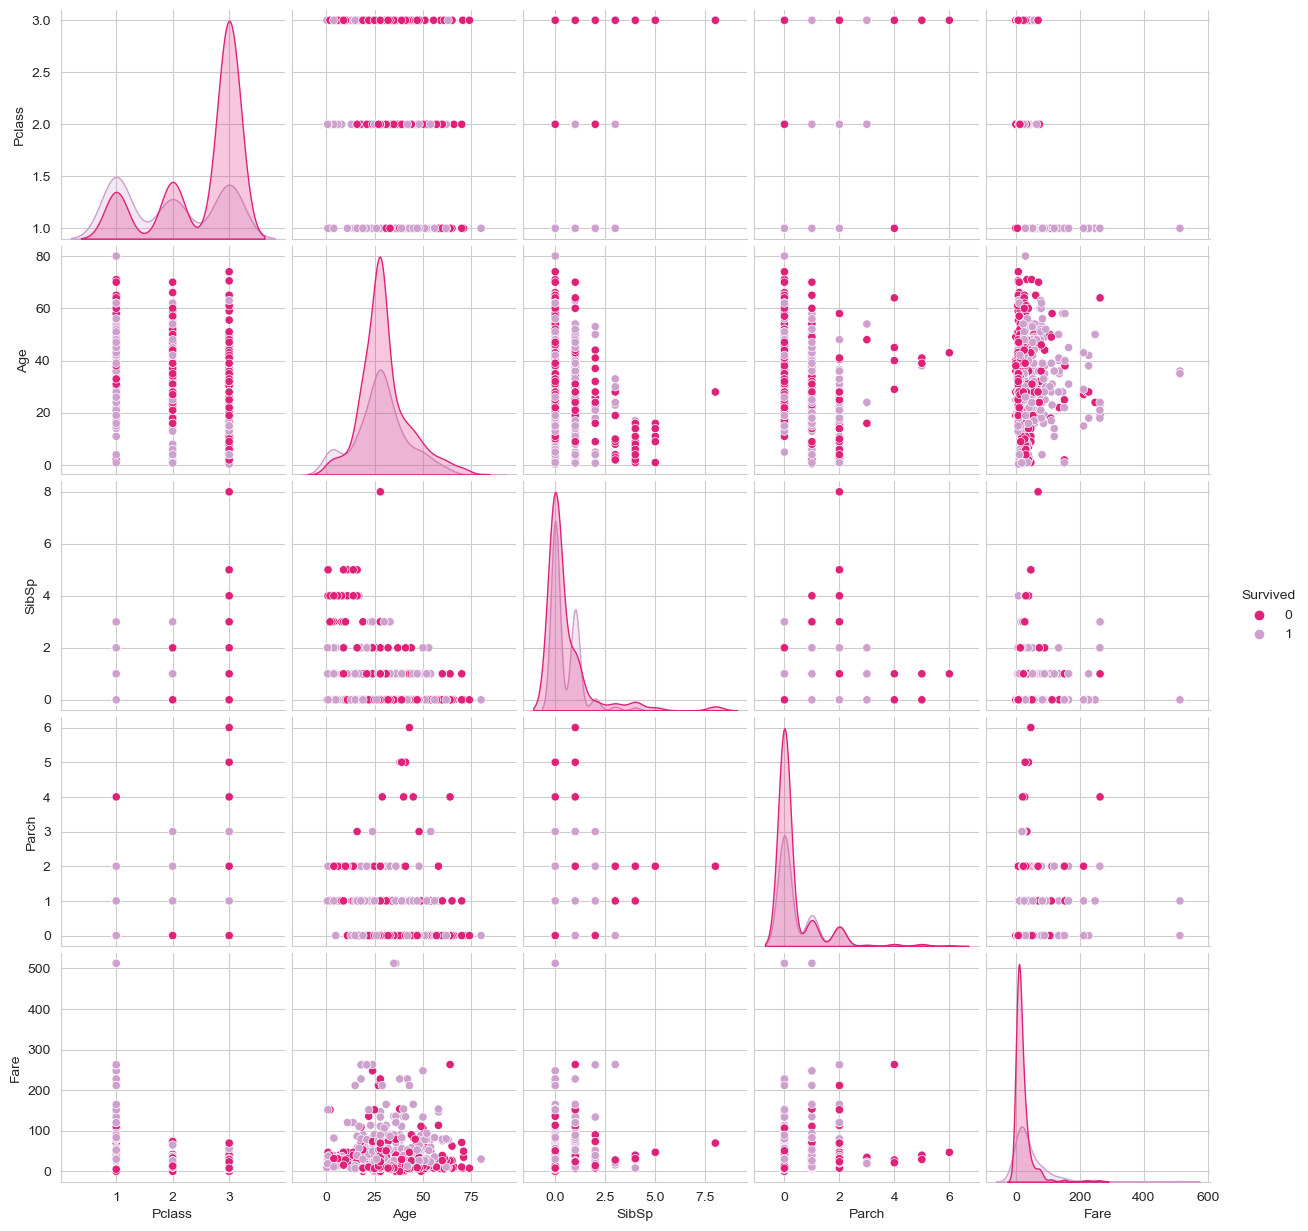

In [64]:
sns.pairplot(titanic,hue='Survived',palette='PuRd_r')
plt.show()

In [66]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [87]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

# Plotting Correlation Plot

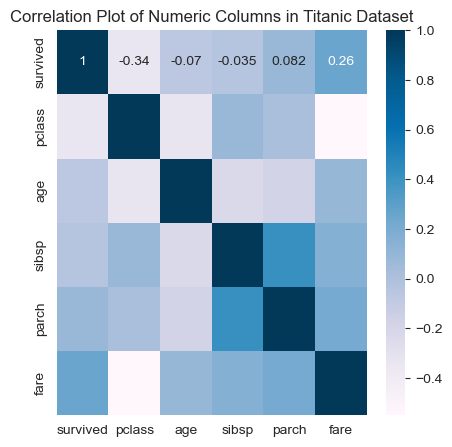

In [95]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Select only the numeric columns
numeric_titanic = titanic.select_dtypes(include=['float64', 'int64'])

# Handle missing values by filling them with the mean of each column
numeric_titanic = numeric_titanic.fillna(numeric_titanic.mean())

# Plot the heatmap
plt.figure(figsize=(5,5))
sns.heatmap(numeric_titanic.corr(), annot=True, cmap='PuBu')
plt.title('Correlation Plot of Numeric Columns in Titanic Dataset')
plt.show()

# Conclusion

#### The sinking of the Titanic is an undoubtedly tragic and historically significant event. The dataset provided encompasses a range of features pertaining to the passengers who were aboard the Titanic. These features include Passengerld, Survived, Pclass, Name, Sex, Age, SibSp. Parch, Ticket, Fare, Cabin, and Embarked. Through analyzing these features, we are able to ascertain the survival rate of the passengers, the influence of Pclass and embarked location on their survival, the distribution of passengers based on age and fare, the survival rate based on gender, and the impact of having siblings, spouses, parents, and children on the passengers' chances of survival, among other insights.

#### This dataset serves as an excellent resource for conducting Exploratory Data Analysis.